# Dangers of speeding in New York City
Nearly every month, one or more person is killed in a speeding related crash in New York City. Speeding may not be the most frequent cause of collisions, but it is the most deadly per crash.
Explainer notebook can be found here: https://github.com/MathiasLH/nbviewertest/blob/main/Explainer.ipynb

First, let's take a look at when and where deaths caused by speeding occur in NYC from December 2015 to April 2021. Each dot represents an accident where at least one person died. A bigger dot means more people died in the accident.

In [11]:
mapTimeLapse()

Looking at raw numbers can be a bit misleading, when talking about mortality rate of a type of collision. For example, driver inattention/distraction has killed and injured the most people from 2015 to 2021, but this is because there are many more collisions of this type. If one looks at the data as amount of people killed or injured per crash, it becomes apparent that speeding is the deadliest type of accident to get into.

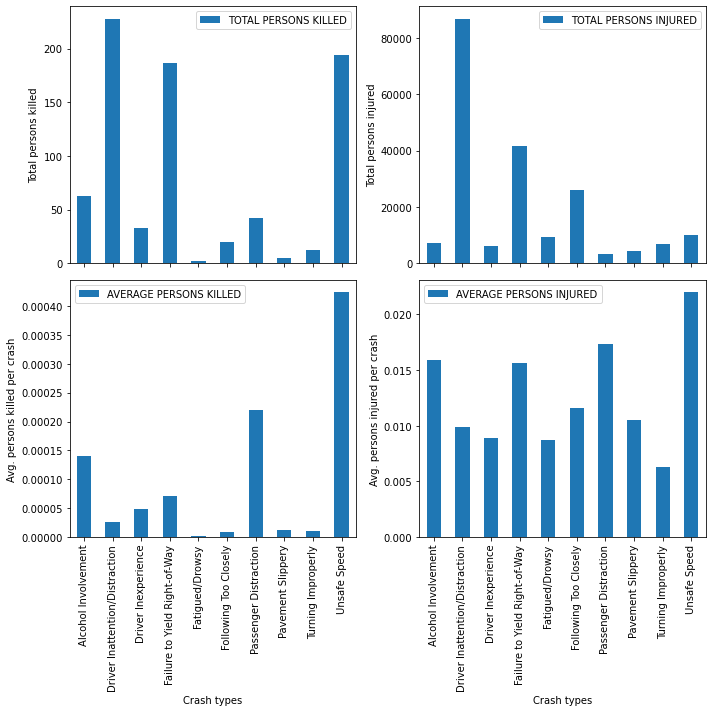

In [12]:
showSpeedingKilledAndInjured()

It could be interesting to look at the type of person killed or injured in speeding related collisions, compared to other collision types, between motorists, cyclists and pedestrians.
As can be seen below, it is overwhelmingly motorists killed by speeding, whereas pedestrians and cyclists are much less common victims.

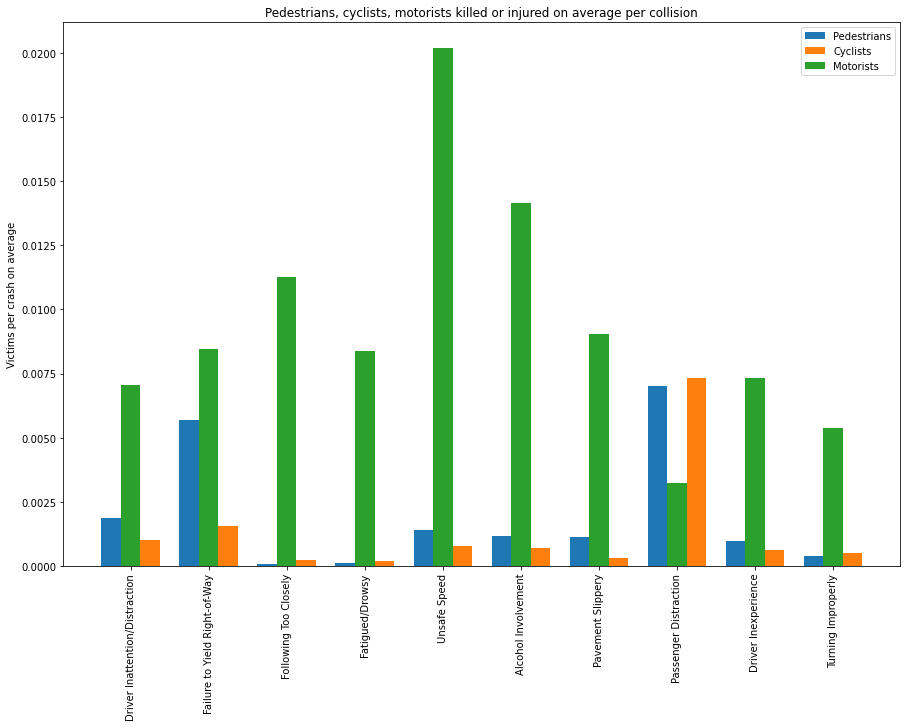

In [13]:
killedAndInjured()

A closer look at just speeding related collisions shows that only 10% of victims were ether cyclists or pedestrians, the rest were motorists.

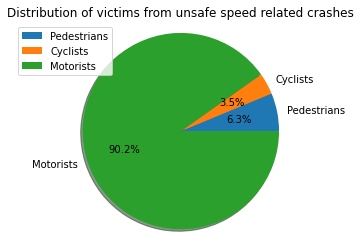

In [14]:
speedingVictims()

This prompted a hypothesis that there would be concentrations of speeding related collisions near high speed roads, i.e. highways. Thus a heat map of the distribution of collisions was created, and three "hotzones" became apparent, all three placed on top of highways.
Perhaps the infrastructure could be improved in these places to disallow such high speeds. Curving the road or installing speed bumps might slow down traffic and save lives.

In [15]:
speedingHeatMap()

Most types of collisions have a time during the day where most of them occur, for example "fatigued/drowsy" has a big spike in cases around the 5pm mark, probably due to people being tired on their way home from work. Alcohol involvement is very concentrated around the night. Speeding is however pretty evenly distributed across the hours of the day, with only a slight rise during the evening.

In [16]:
collisionsTimeOfDay()

Loading BokehJS ...

One last point of interest is what type of vehicle are the cause of speeding collisions most often.
Below is a bar chart depicting for each vehicle type, what proportion of collisions they've caused are speeding related, e.g. 2% of collisions caused by sedans are due to speeding, whereas only 0.25% of collisions caused by buses are due to speeding.

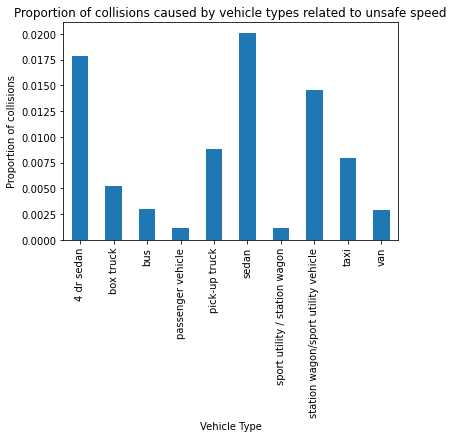

In [17]:
vehicleTypes()

# Code

In [1]:
#Setup
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, TimestampedGeoJson
from folium import plugins
import matplotlib.pyplot as plt
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, FactorRange, Legend
import warnings
warnings.filterwarnings("ignore")

data = pd .read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", parse_dates=['CRASH DATE'])
data = data[(data['LATITUDE'].notna())]
data = data[(data['LONGITUDE'].notna())]
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format="%H:%M")
indexNames = data[(data['CRASH TIME'].dt.hour == 0) & (data['CRASH TIME'].dt.minute == 0)].index
data.drop(indexNames, inplace=True)
data['CRASH TIME'] = data['CRASH TIME'].dt.hour
data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].str.lower()
speedingData = data[data['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed']

focusCrashes = ['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely', 'Fatigued/Drowsy', 'Unsafe Speed', 'Alcohol Involvement', 'Pavement Slippery', 'Passenger Distraction', 'Driver Inexperience', 'Turning Improperly']
focusVehicles = ['sedan','passenger vehicle','station wagon/sport utility vehicle','sport utility / station wagon','taxi','pick-up truck','van','4 dr sedan','bus','box truck']

pedestrians = []
pedestriansNormalized = []
cyclists = []
cyclistsNormalized = []
motorists = []
motoristsNormalized = []

lat =  40.76416398327681
lon = -73.97941864394394

In [2]:
def showSpeedingKilledAndInjured():
    
    focusCrashdf = data[data['CONTRIBUTING FACTOR VEHICLE 1'].isin(focusCrashes)]
    sum_df_kill = focusCrashdf.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).agg({'NUMBER OF PERSONS KILLED': 'sum'})
    sum_df_injured = focusCrashdf.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).agg({'NUMBER OF PERSONS INJURED': 'sum'})
    sum_df_kill_avg = sum_df_kill.copy()
    sum_df_injured_avg = sum_df_injured.copy()
    sum_df_kill.columns = ['TOTAL PERSONS KILLED']
    sum_df_injured.columns = ['TOTAL PERSONS INJURED']
    sum_df_kill_avg.columns = ['AVERAGE PERSONS KILLED']
    sum_df_injured_avg.columns = ['AVERAGE PERSONS INJURED']
    for x in focusCrashes:
        sum_df_kill_avg.loc[x] = sum_df_kill_avg.loc[x] / focusCrashdf[focusCrashdf['CONTRIBUTING FACTOR VEHICLE 1'] == x].size
        sum_df_injured_avg.loc[x] = sum_df_injured_avg.loc[x] / focusCrashdf[focusCrashdf['CONTRIBUTING FACTOR VEHICLE 1'] == x].size
    fig,axes = plt.subplots(nrows=2, ncols=2, sharex=True)
    sum_df_kill.plot(kind='bar', ylabel='Total persons killed', xlabel='Crash types', ax=axes[0,0], figsize=(10,10))
    sum_df_injured.plot(kind='bar', ylabel='Total persons injured', xlabel='Crash types', ax=axes[0,1], figsize=(10,10))
    sum_df_kill_avg.plot(kind='bar', ylabel='Avg. persons killed per crash', xlabel='Crash types', ax=axes[1,0], figsize=(10,10))
    sum_df_injured_avg.plot(kind='bar', ylabel='Avg. persons injured per crash', xlabel='Crash types', ax=axes[1,1], figsize=(10,10))
    plt.tight_layout()
    plt.show() 

In [3]:
def speedingHeatMap():
    heatspeed = [[[row['LATITUDE'],row['LONGITUDE']] for index, row in speedingData[speedingData['CRASH TIME'] == i].iterrows()] for i in range(0,23)]
    NYCmap = folium.Map([lat, lon], zoom_start=10, zoom_control = False,scrollWheelZoom=False,dragging=False)
    crashHeat= [[row['LATITUDE'],row['LONGITUDE']] for index, row in speedingData.iterrows()]
    folium.Circle([40.60008630645886, -73.76139759409564],color = 'PURPLE', radius = 1000).add_to(NYCmap)
    folium.Circle([40.671507849222266, -73.89555188877128],color = 'PURPLE', radius = 1500).add_to(NYCmap)
    folium.Circle([40.84402799940109, -73.91364388960896],color = 'PURPLE', radius = 2200).add_to(NYCmap)
    HeatMap(crashHeat, radius=12, max_zoom=5).add_to(NYCmap)
    display(NYCmap)

In [5]:
def collisionsTimeOfDay():
    hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    hoursStrings=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
    focusCrashesSet = (['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely', 'Fatigued/Drowsy', 'Unsafe Speed', 'Alcohol Involvement', 'Pavement Slippery', 'Passenger Distraction', 'Driver Inexperience', 'Turning Improperly'])
    normalizedData = pd.DataFrame(hours, columns=['Hours'])
    for x in focusCrashesSet:
        hoursArray=[]
        for i in range(0,24):
            hoursArray.append(data[(data['CONTRIBUTING FACTOR VEHICLE 1'] == x) & (data['CRASH TIME'] == i)].size/data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].size)
        normalizedData[x] = hoursArray
    output_notebook()
    source = ColumnDataSource(normalizedData)
    p = figure(x_range = FactorRange(factors=hoursStrings), x_axis_label = "hour of the day",width = 900, margin = 10)
    bar = {}
    items = []
    colors= ['#ff0000', '#ff5e00', '#ffd900', '#c8ff00', '#3cff00', '#00ffb7', '#00eaff', '#005eff', '#7300ff', '#d000ff']
    for index, i in enumerate(focusCrashes):
        bar[i] = p.vbar(x="Hours", top = i, source = source, muted_alpha= 0.05, muted=True, fill_color=colors[index], width=(0.90))
        items.append((i,[bar[i]]))
    legend = Legend(items = items, location=(0,-30))
    p.add_layout(legend, 'left')
    p.legend.click_policy="mute"
    show(p)

In [6]:
def killedAndInjured():
    for x in focusCrashes:
        pedestrians.append(data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF PEDESTRIANS KILLED': 'sum'})[0] + data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF PEDESTRIANS INJURED': 'sum'})[0])
        pedestriansNormalized.append(((data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF PEDESTRIANS KILLED': 'sum'})[0] + data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF PEDESTRIANS INJURED': 'sum'})[0])/data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].size))
        cyclists.append(data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF CYCLIST KILLED': 'sum'})[0] + data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF CYCLIST INJURED': 'sum'})[0])
        cyclistsNormalized.append((data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF CYCLIST KILLED': 'sum'})[0] + data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF CYCLIST INJURED': 'sum'})[0])/data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].size)
        motorists.append(data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF MOTORIST KILLED': 'sum'})[0] + data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF MOTORIST INJURED': 'sum'})[0])
        motoristsNormalized.append((data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF MOTORIST KILLED': 'sum'})[0] + data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].agg({'NUMBER OF MOTORIST INJURED': 'sum'})[0])/data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].size)
    x = np.arange(len(focusCrashes))
    width = 0.25
    fig, ax = plt.subplots(figsize=(15,10))
    rects1 = ax.bar(x-width, pedestriansNormalized, width, label='Pedestrians')
    rects2 = ax.bar(x+width, cyclistsNormalized, width, label='Cyclists')
    rects3 = ax.bar(x,motoristsNormalized, width, label='Motorists')
    ax.set_ylabel('Victims per crash on average')
    ax.set_xticks(x)
    ax.set_xticklabels(focusCrashes)
    ax.legend()
    ax.set_title("Pedestrians, cyclists, motorists killed or injured on average per collision")
    plt.xticks(rotation=90)
    plt.show()

In [7]:
def speedingVictims():
    labels = ['Pedestrians', 'Cyclists', 'Motorists']
    sizes = [pedestrians[4], cyclists[4], motorists[4]]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels = labels, shadow = True, autopct='%1.1f%%')
    ax1.axis('equal')
    ax1.set_title("Distribution of victims from unsafe speed related crashes")
    plt.legend()
    plt.show()

In [8]:
def vehicleTypes():
    vehicleTypeData = data[data['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed']
    vehicleTypeData = vehicleTypeData[vehicleTypeData['VEHICLE TYPE CODE 1'].isin(focusVehicles)].groupby('VEHICLE TYPE CODE 1').size()
    vehicleNumbers = data[data['VEHICLE TYPE CODE 1'].isin(focusVehicles)].groupby('VEHICLE TYPE CODE 1').size()
    vehicleNumbers = vehicleTypeData/vehicleNumbers
    vehicleNumbers.plot(kind="bar",ylabel="Proportion of collisions",xlabel="Vehicle Type", title="Proportion of collisions caused by vehicle types related to unsafe speed")
    plt.show()

In [9]:
def create_geojson_features(df):
    features = []
    
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type': 'Point',
                'coordinates':[row['LONGITUDE'], row['LATITUDE']]
            },
            'properties':{
                'time':row['CRASH DATE'].__str__(),
                'style':{'color' : 'purple'},
                'icon': 'circle',
                'tooltip': 'asd',
                'iconstyle': {
                    'fillColor': 'purple',
                    'fillOpacity': 1,
                    'stroke': 'true',
                    'radius':row['NUMBER OF PERSONS KILLED']+2
                }
            }
        }
        features.append(feature)
    return features


In [10]:
def mapTimeLapse():
    speedKillingData = speedingData[speedingData['NUMBER OF PERSONS KILLED'] != 0]
    crash_geojson = create_geojson_features(speedKillingData)
    NYCmap = folium.Map([lat, lon], zoom_start=10, zoom_control = False,scrollWheelZoom=False,dragging=False, titles = "test")
    TimestampedGeoJson(crash_geojson,
                      period = 'P1M',
                       #duration = 'P1M',
                      transition_time = 1000,
                      date_options='YYYY/MM',
                      auto_play = True).add_to(NYCmap)
    display(NYCmap)